In [11]:
from UCLSE.dyna_q.Experiment2a import Experiment,Dyna_QAgentTabular
from UCLSE.dyna_q.dyna_q import TabularMemory
import numpy as np
import pandas as pd
import visdom

import threading
import logging
from queue import Queue
import os

In [12]:
vis=visdom.Visdom(port=8097)

In [13]:
def reward_oracle(observation,cutoff=50,ub=6,lb=-2,lamb=0.5):


    distance=observation.distance
    inventory=observation.inventory
    orders_out=observation.orders_out
    bid_change=observation.bid_change
    bid_ask_spread=observation.bid_ask_spread
    time_left=observation.time_left

    ans=lamb*bid_change

    if inventory==0:   #terminal            
            
            ans+=-(1-lamb)*distance
            ans-=lamb*bid_change

    elif inventory>1: #terminal
            
            ans+=-bid_ask_spread*(inventory-1)
            ans+=-(1-lamb)*distance
           
    else:

            if orders_out>0: 
                ans+=1/250


            if time_left==1: #terminal takes account of exit spread
               
                ans+=-(1-lamb)*distance

            if -distance>=ub:
                
                ans+=-(1-lamb)*distance
              

            elif -distance<lb:
               
                ans+=-(1-lamb)*distance
               

    return ans 

def done_oracle(observation,cutoff=50,lb=-2,ub=6):

    distance=observation.distance
    inventory=observation.inventory
    orders_out=observation.orders_out
    time_left=observation.time_left

    if inventory==0:
        done=1
        why=f'inventory {inventory}=0'
    elif time_left>=1:
        done=1
        why=f'time up {time_left}'
    elif inventory>1:
        done=1
        why=f'inventory {inventory}>1'
    elif -distance>=ub:
        done=1
        why=f'-distance {distance} >ub {ub}'
    elif -distance<lb: 
        done=1
        why=f'-distance {distance}<lb {lb}'

    else:
        done=0 
        why=None
    return done,why

In [14]:
trader_pref_kwargs={'qty_min':-5,'qty_max':5,'sigma_pv':1}
timer_kwargs={'start':0,'end':5000,'step':1}
price_sequence_kwargs={'kappa':0.0002,'mean':100,'sigma':1,'block_length':10}
noise_kwargs={'sigma':1}
messenger_kwargs={'logging':True}
env_kwargs={'trader_arrival_rate':1,'recording':True,#'process_verbose':False,
                'bookkeep_verbose':False, 'lob_verbose':False}
sigma_n=5

def cont_coef():
    return np.random.uniform(0.2,0.8)

def personal_memory():
    return int(np.random.uniform(5,10))

trader_kwargs={'ZIP':{'prefix':'ZIP','number':10,'object_name':'WW_Zip',
                          'setup_kwargs':
                                {'market_make':True,'prior':(100,sigma_n)}},
               'HBL':{'prefix':'HBL','number':10,'object_name':'HBL',
                          'setup_kwargs':
                              {'memory':100,'grace_period':20}},
               'CON':{'prefix':'CON','number':10,'object_name':'ContTrader',
                      'setup_kwargs':
                          {'cont_coeff':cont_coef,'personal_memory':personal_memory,'profit_target':4, 'market_make':True,
                          'prior':(100,sigma_n)}},
               'NOI':{'prefix':'NOI','number':10,'object_name':'NoiseTrader',
                          'setup_kwargs':{'memory':20}}
              }

lobenv_kwargs={'cutoff':100,'profit_target':10,'loss_limit':-2,'reward_func':reward_oracle,'lamb':0.5}


exploration ={"mode":'UCB',
        "type": "exponential",
        "init_epsilon": 0.8,
        "min_epsilon": 0.01,
        "decay_steps": 100000,
        "decay_eps": 0.99,
        "choice":'least_bonus'}

agent_kwargs={'n_actions':5,'initial_Q':1,'init_epsilon':0.8,'exploration':exploration,
             'memory_capacity':1000000,'n_statespace':9}



experiment=Experiment(trader_pref_kwargs,timer_kwargs,
           price_sequence_kwargs,noise_kwargs,
           messenger_kwargs,env_kwargs,trader_kwargs,
           lobenv_kwargs,agent_kwargs=agent_kwargs,visdom=vis,agent=Dyna_QAgentTabular,name='Experiment 2 UCB Q')

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL


In [5]:
experiment.new_train_setup(planning_steps=1,planning=True,graph=True,MaxEpisodes=1000)

In [14]:
experiment.train(MaxEpisodes=20000,folder='Results/'+experiment.name,start_episode=experiment.episode)

Exploration is UCB
Saving best checkpoint at episode 19631 with reward 1.1422800000000002
Dyna-Q - EXP: 1 | Ep: 19641 | timestep: 5 | Ep_r:  1.016 Profit: 0 Avg loss:1.12064 |  Time to backup 0.5732831954956055
Dyna-Q - EXP: 1 | Ep: 19661 | timestep: 36 | Ep_r:  1.1360000000000001 Profit: 0 Avg loss:0.8858400000000001 |  Time to backup 0.38710808753967285
Dyna-Q - EXP: 1 | Ep: 19681 | timestep: 18 | Ep_r:  2.064 Profit: 1 Avg loss:0.7197199999999999 |  Time to backup 0.45612192153930664
Dyna-Q - EXP: 1 | Ep: 19701 | timestep: 13 | Ep_r:  3.04 Profit: 1 Avg loss:0.75788 |  Time to backup 0.4053797721862793
Dyna-Q - EXP: 1 | Ep: 19721 | timestep: 5 | Ep_r:  1.766 Profit: 0 Avg loss:0.9798399999999999 |  Time to backup 0.44269728660583496
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP: 

In [16]:
experiment.EPSILON

0.01

In [15]:
Experiment.resume(exp=experiment,best=True,folder='Results/'+experiment.name)

=> loading checkpoint 'Results/Experiment 2 UCB Q\dyna_best.pth.tar'
=> loaded checkpoint 'Results/Experiment 2 UCB Q\dyna_best.pth.tar' (epoch 19632)
keys unused in checkpoint data:  ['episode', 'setup']


In [6]:
experiment.recover_plots()

In [7]:
experiment.agent.tabular

state counter length: 4441, state_action counter length: 13996, total experiences: 281436

In [16]:

experiment.test_setup(MaxEpisodes=5000,agent=experiment.agent)

sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL


C:\Users\micro_zo50ceu\OneDrive - University College London\BUCLSE\UCLSE\dyna_q\Experiment2a.py:608: UserWarning: no eval net for agent, skipping
  warnings.warn('no eval net for agent, skipping')


Dyna-Q - EXP 1, | Ep: , 1, | timestep:  3 | Ep_r: 1.008|profit:0 start:225|end:228
Dyna-Q - EXP 1, | Ep: , 11, | timestep:  14 | Ep_r: 1.302|profit:1 start:1555|end:1569
Dyna-Q - EXP 1, | Ep: , 21, | timestep:  14 | Ep_r: 1.052|profit:0 start:2908|end:2922
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 31, | timestep:  2 | Ep_r: 1.004|profit:0 start:52|end:54
Dyna-Q - EXP 1, | Ep: , 41, | timestep:  10 | Ep_r: 1.036|profit:0 start:1228|end:1238
Dyna-Q - EXP 1, | Ep: , 51, | timestep:  14 | Ep_r: 2.052|profit:1 start:2588|end:2602
Dyna-Q - EXP 1, | Ep: , 61, | timestep:  84 | Ep_r: -0.16799999999999976|profit:-1 start:3753|end:3837
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 71, | timestep:  9 | Ep_r: -1.468|profit:-3 start:843|end:852
Dyna-Q - EXP 1, | Ep: , 81, | timestep:  2 | Ep_r: 2.004|profit:1 start:2039|end:2041
Dyna-Q - EXP 1, | Ep: , 91, | timestep:  5 | Ep_r: 1

Dyna-Q - EXP 1, | Ep: , 721, | timestep:  9 | Ep_r: 1.032|profit:0 start:972|end:981
Dyna-Q - EXP 1, | Ep: , 731, | timestep:  8 | Ep_r: -1.472|profit:-3 start:2278|end:2286
Dyna-Q - EXP 1, | Ep: , 741, | timestep:  3 | Ep_r: 1.008|profit:0 start:3519|end:3522
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 751, | timestep:  18 | Ep_r: 1.068|profit:0 start:745|end:763
Dyna-Q - EXP 1, | Ep: , 761, | timestep:  12 | Ep_r: 1.044|profit:0 start:1992|end:2004
Dyna-Q - EXP 1, | Ep: , 771, | timestep:  20 | Ep_r: 2.076|profit:1 start:3327|end:3347
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 781, | timestep:  8 | Ep_r: 1.028|profit:-1 start:503|end:511
Dyna-Q - EXP 1, | Ep: , 791, | timestep:  24 | Ep_r: 1.092|profit:0 start:1754|end:1778
Dyna-Q - EXP 1, | Ep: , 801, | timestep:  33 | Ep_r: 2.128|profit:1 start:3108|end:3141
sequence made
adding exchange to RL trader  RL
adding e

Dyna-Q - EXP 1, | Ep: , 1431, | timestep:  59 | Ep_r: -0.2679999999999998|profit:-2 start:1562|end:1621
Dyna-Q - EXP 1, | Ep: , 1441, | timestep:  6 | Ep_r: 3.02|profit:2 start:2959|end:2965
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 1451, | timestep:  3 | Ep_r: 1.008|profit:0 start:258|end:261
Dyna-Q - EXP 1, | Ep: , 1461, | timestep:  31 | Ep_r: 1.12|profit:0 start:1487|end:1518
Dyna-Q - EXP 1, | Ep: , 1471, | timestep:  3 | Ep_r: 1.008|profit:0 start:2791|end:2794
Dyna-Q - EXP 1, | Ep: , 1481, | timestep:  6 | Ep_r: 1.02|profit:0 start:3962|end:3968
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 1491, | timestep:  9 | Ep_r: 1.028|profit:0 start:952|end:961
Dyna-Q - EXP 1, | Ep: , 1501, | timestep:  9 | Ep_r: 1.032|profit:0 start:2140|end:2149
Dyna-Q - EXP 1, | Ep: , 1511, | timestep:  19 | Ep_r: 1.072|profit:0 start:3595|end:3614
sequence made
adding exchange to RL t

Dyna-Q - EXP 1, | Ep: , 2131, | timestep:  10 | Ep_r: 1.036|profit:0 start:137|end:147
Dyna-Q - EXP 1, | Ep: , 2141, | timestep:  12 | Ep_r: 2.044|profit:1 start:1336|end:1348
Dyna-Q - EXP 1, | Ep: , 2151, | timestep:  11 | Ep_r: 0.79|profit:-1 start:2583|end:2594
Dyna-Q - EXP 1, | Ep: , 2161, | timestep:  33 | Ep_r: 1.116|profit:-1 start:3862|end:3895
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 2171, | timestep:  27 | Ep_r: -0.6459999999999999|profit:-2 start:995|end:1022
Dyna-Q - EXP 1, | Ep: , 2181, | timestep:  14 | Ep_r: 2.052|profit:1 start:2150|end:2164
Dyna-Q - EXP 1, | Ep: , 2191, | timestep:  8 | Ep_r: 1.028|profit:0 start:3371|end:3379
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 2201, | timestep:  10 | Ep_r: -0.46399999999999997|profit:-2 start:550|end:560
Dyna-Q - EXP 1, | Ep: , 2211, | timestep:  55 | Ep_r: -0.5339999999999998|profit:-1 start:1839|end:189

Dyna-Q - EXP 1, | Ep: , 2841, | timestep:  10 | Ep_r: 2.036|profit:1 start:2891|end:2901
Dyna-Q - EXP 1, | Ep: , 2851, | timestep:  32 | Ep_r: 0.10800000000000007|profit:-1 start:4095|end:4127
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 2861, | timestep:  28 | Ep_r: 1.108|profit:0 start:1135|end:1163
Dyna-Q - EXP 1, | Ep: , 2871, | timestep:  40 | Ep_r: -3.844|profit:-2 start:2624|end:2664
Dyna-Q - EXP 1, | Ep: , 2881, | timestep:  21 | Ep_r: 2.076|profit:1 start:3807|end:3828
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 2891, | timestep:  9 | Ep_r: 1.032|profit:0 start:1190|end:1199
Dyna-Q - EXP 1, | Ep: , 2901, | timestep:  43 | Ep_r: -1.3319999999999999|profit:-1 start:2419|end:2462
Dyna-Q - EXP 1, | Ep: , 2911, | timestep:  3 | Ep_r: 1.008|profit:0 start:3792|end:3795
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | 

Dyna-Q - EXP 1, | Ep: , 3541, | timestep:  2 | Ep_r: 1.004|profit:0 start:1790|end:1792
Dyna-Q - EXP 1, | Ep: , 3551, | timestep:  10 | Ep_r: 1.036|profit:0 start:3029|end:3039
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 3561, | timestep:  12 | Ep_r: 1.044|profit:0 start:273|end:285
Dyna-Q - EXP 1, | Ep: , 3571, | timestep:  15 | Ep_r: 1.056|profit:0 start:1484|end:1499
Dyna-Q - EXP 1, | Ep: , 3581, | timestep:  14 | Ep_r: 1.052|profit:0 start:2733|end:2747
Dyna-Q - EXP 1, | Ep: , 3591, | timestep:  52 | Ep_r: 1.2000000000000002|profit:0 start:4001|end:4053
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 3601, | timestep:  22 | Ep_r: 3.084|profit:2 start:1190|end:1212
Dyna-Q - EXP 1, | Ep: , 3611, | timestep:  9 | Ep_r: -1.468|profit:-2 start:2390|end:2399
Dyna-Q - EXP 1, | Ep: , 3621, | timestep:  3 | Ep_r: -0.492|profit:-4 start:3589|end:3592
sequence made
adding exchan

Dyna-Q - EXP 1, | Ep: , 4241, | timestep:  23 | Ep_r: -0.4119999999999999|profit:-1 start:1239|end:1262
Dyna-Q - EXP 1, | Ep: , 4251, | timestep:  17 | Ep_r: 1.064|profit:0 start:2495|end:2512
Dyna-Q - EXP 1, | Ep: , 4261, | timestep:  11 | Ep_r: 1.04|profit:0 start:3622|end:3633
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 4271, | timestep:  3 | Ep_r: 0.758|profit:-1 start:763|end:766
Dyna-Q - EXP 1, | Ep: , 4281, | timestep:  15 | Ep_r: 1.056|profit:0 start:1966|end:1981
Dyna-Q - EXP 1, | Ep: , 4291, | timestep:  10 | Ep_r: 1.036|profit:0 start:3192|end:3202
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 4301, | timestep:  16 | Ep_r: 1.06|profit:0 start:405|end:421
Dyna-Q - EXP 1, | Ep: , 4311, | timestep:  24 | Ep_r: 1.092|profit:0 start:1586|end:1610
Dyna-Q - EXP 1, | Ep: , 4321, | timestep:  5 | Ep_r: -2.484|profit:-3 start:2804|end:2809
Dyna-Q - EXP 1, | Ep: , 4331,

Dyna-Q - EXP 1, | Ep: , 4951, | timestep:  2 | Ep_r: 2.004|profit:1 start:3432|end:3434
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 4961, | timestep:  20 | Ep_r: -1.424|profit:-2 start:516|end:536
Dyna-Q - EXP 1, | Ep: , 4971, | timestep:  10 | Ep_r: 1.036|profit:0 start:1749|end:1759
Dyna-Q - EXP 1, | Ep: , 4981, | timestep:  12 | Ep_r: 1.044|profit:0 start:3194|end:3206
sequence made
adding exchange to RL trader  RL
adding exchange to RL trader  RL
Dyna-Q - EXP 1, | Ep: , 4991, | timestep:  26 | Ep_r: 1.1|profit:0 start:321|end:347


In [17]:
experiment.rwd_test

[(225, 228, 3, 0, 1.008, 0, 0.1),
 (334, 354, 23, 1, 1.076, 0, 0.1),
 (456, 488, 55, 2, 0.1160000000000001, -1, 0.1),
 (589, 621, 87, 3, 1.124, 0, 0.1),
 (759, 762, 90, 4, 1.008, 0, 0.1),
 (863, 877, 104, 5, 1.052, 0, 0.1),
 (978, 1031, 157, 6, 1.2080000000000002, 0, 0.1),
 (1140, 1149, 166, 7, 0.032, -3, 0.2),
 (1250, 1267, 183, 8, 1.064, 0, 0.1),
 (1368, 1454, 269, 9, -1.4099999999999997, -1, 0.1),
 (1555, 1569, 283, 10, 1.302, 1, 0.0),
 (1670, 1680, 293, 11, 1.036, 0, 0.1),
 (1796, 1822, 319, 12, 0.09600000000000009, -1, 0.1),
 (1923, 1967, 363, 13, 1.1720000000000002, 0, 0.1),
 (2068, 2095, 390, 14, -0.3959999999999999, -2, 0.1),
 (2207, 2217, 400, 15, 1.036, 0, 0.1),
 (2363, 2367, 404, 16, 1.012, 0, 0.1),
 (2468, 2538, 474, 17, 1.2760000000000002, 0, 0.1),
 (2639, 2655, 490, 18, 2.06, 1, 0.1),
 (2756, 2797, 531, 19, 1.1600000000000001, 0, 0.1),
 (2908, 2922, 545, 20, 1.052, 0, 0.1),
 (3034, 3072, 583, 21, -0.6019999999999999, -1, 0.1),
 (3173, 3190, 600, 22, 2.064, 1, 0.1),
 (3295

In [20]:
d.describe()

,0,1,2,3,4,5
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,1976.172000,1993.29600,4262.352000,249.500000,0.839176,-0.366000
std,1198.882559,1199.34761,2534.577694,144.481833,1.115597,1.362261
min,20.000000,24.00000,24.000000,0.000000,-3.698000,-7.000000
25%,942.750000,966.75000,1982.500000,124.750000,1.004000,-1.000000
50%,1927.000000,1949.50000,4267.500000,249.500000,1.032000,0.000000
75%,3011.000000,3025.50000,6418.750000,374.250000,1.108000,0.000000
max,4100.000000,4191.00000,8562.000000,499.000000,3.600000,4.000000


In [18]:
from UCLSE.dyna_q.Experiment1a import Experiment

In [9]:
experiment.agent_test.memory

array([[0.1 , 1.  , 0.  , ..., 0.5 , 0.35, 0.  ],
       [0.  , 1.  , 1.  , ..., 0.5 , 0.3 , 0.  ],
       [0.  , 1.  , 1.  , ..., 0.5 , 0.45, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

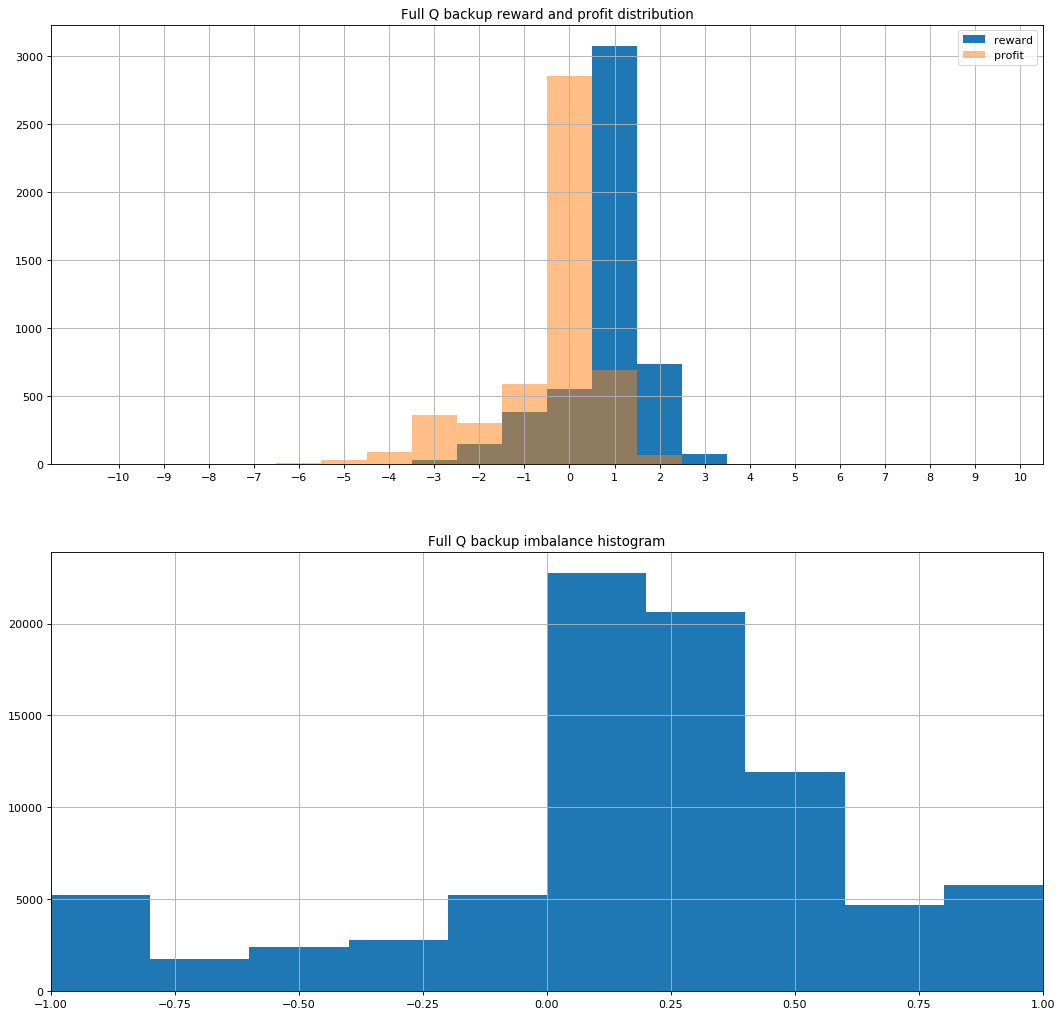

In [19]:


path='Results'
d,memory=Experiment.plotbm_results(experiment,'Full Q backup reward and profit distribution',
                                   'Full Q backup imbalance histogram',name=experiment.name,path=path)

In [18]:
memory.n_inventory.value_counts(), memory.action.value_counts()

(1.0    1472
 0.0      82
 2.0      18
 Name: n_inventory, dtype: int64, 3.0    543
 0.0    516
 2.0    382
 4.0    116
 1.0     15
 Name: action, dtype: int64)

In [19]:
d.describe()

,reward,profit,start distance,duration
count,100.000000,100.000000,100.000000,100.000000
mean,0.840780,-0.420000,0.106000,15.720000
std,1.036164,1.349747,0.034289,15.410268
min,-1.968000,-4.000000,-0.100000,1.000000
25%,1.007000,-1.000000,0.100000,7.000000
50%,1.036000,0.000000,0.100000,11.500000
75%,1.084000,0.000000,0.100000,19.250000
max,3.144000,2.000000,0.200000,86.000000


In [17]:
clf,train_score,test_score,importances=Experiment.fit_tree(memory,os.path.join('Results',experiment.name),experiment)

In [44]:
tab=experiment.dyna_q_agent.tabular
sample_state=tuple(tab.sample_state(reps=1))[0]
sample_action=tab.sample_action_from_state(sample_state)
sample_action

0

In [46]:
tab.memory[sample_state][sample_action]

{'count': 16,
 'reward': Counter({0.004: 14, -9.0: 2}),
 'done': Counter({0: 14, 1: 2}),
 's_': Counter({(0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.0, 0.0), 0): 4,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.05, 0.0), 0): 2,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.2, 0.0), 0): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.1, 0.0), 0): 1,
          (-9.0, (0.0, 2, 1, 0.0, 0, 0.2, 1.0, 0.0, 0.0), 1): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.05, 0.0), 0): 3,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.2, 0.0), 0): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, 0.25, 0.0), 0): 1,
          (0.004, (0.0, 1, 1, 0.0, 0, 0.2, 1.0, -0.3, 0.0), 0): 1,
          (-9.0, (0.0, 2, 1, 0.0, 0, 0.2, 1.0, -0.05, 0.0), 1): 1}),
 'Q': -1.2072998717367351}

In [49]:
np.sqrt(np.log(experiment.total_steps)/(2*tab.memory[sample_state][sample_action]['count']))

0.6341608968320384

In [51]:
from math import sqrt,log

In [52]:
%timeit sqrt(845000)

101 ns ± 6.16 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [53]:
%timeit np.sqrt(845000)

924 ns ± 8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [34]:
def q_update(tab,sample_state,sample_action,val=0,gamma=0.5):
    if 'Q' not in tab.memory[sample_state][sample_action]:
        tab.memory[sample_state][sample_action]['Q']=val


    trans=tab.memory[sample_state][sample_action]['s_']
    denom=tab.memory[sample_state][sample_action]['count']
            #sum_a (p(s,s_,a)*(R_(s,s_,a)+gamma*terminal_state*max_a'(Q(s_,a')))
    return gamma*sum([count*(k[0]+((k[2]+1)%2)*max_get_Q(tab,k[1])) for k,count in trans.items()])/denom
    
def max_get_Q(tab,state,total_steps,val=0,beta=1):
    max_state=-1
    UCB_num=sqrt(beta*log(total_steps))
    for action,dic in tab.memory[sample_state].items():
        if 'Q' not in dic: dic['Q']=val
            
        times_visited=dic['count']
        UCB_denom=sqrt(2*times_visited)
        UCB=UCB_num/UCB_denom
            
        if dic['Q']+UCB>max_state:
            max_action=action
            max_state=dic['Q']
            
    return max_state

def wipe_update(tab,val):
    #for all q values in the memory, set to a value
    for state in tab.memory:
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']=val
            
def full_update(tab,gamma):
    for state in tab.memory:
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']+=q_update(tab,state,action,gamma)
            




In [33]:
gamma=experiment.dyna_q_agent.gamma
gamma
tab=experiment.dyna_q_agent.tabular

In [35]:
%timeit tab.full_update(gamma)

464 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
def memoize(f):
    memo = {}
    def helper(*x,**kwargs):
        if x not in memo:            
            memo[tuple(x)] = f(*x,**kwargs)
        return memo[x]
    return helper


def q_update(tab,sample_state,sample_action,max_get_Q,val=0,gamma=0.5):
    if 'Q' not in tab.memory[sample_state][sample_action]:
        tab.memory[sample_state][sample_action]['Q']=val


    trans=tab.memory[sample_state][sample_action]['s_']
    denom=tab.memory[sample_state][sample_action]['count']
            #sum_a (p(s,s_,a)*(R_(s,s_,a)+gamma*terminal_state*max_a'(Q(s_,a')))
    return sum([count*(k[0]+gamma*((k[2]+1)%2)*tab.max_get_Q(k[1])[0]) for k,count in trans.items()])/denom

def max_get_Q(tab,state,val=0):
    max_state_value=-100000

    if state in tab.memory:

        for action,dic in tab.memory[state].items():
            if 'Q' not in dic: dic['Q']=val
            if dic['Q']>max_state_value:
                max_action=action
                max_state_value=dic['Q']

    else:
        #the next state has not been experienced in memory
        max_state_value=tab.initial_Q
        max_action=np.random.randint(0,tab.n_actions)

    return max_state_value,max_action

def full_update_memo(tab,gamma):
    
    for state in tab.memory:
        mem_max_get_Q=memoize(max_get_Q) 
        for action in tab.memory[state]:
            tab.memory[state][action]['Q']=q_update(tab,state,action,mem_max_get_Q,gamma=gamma)


In [41]:

%timeit full_update_memo(tab,gamma)

416 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:




def worker(tab,state,action,gamma):
    
    #logging.debug('Starting')
    tab.memory[state][action]['Q']+=tab.q_update(state,action,gamma=gamma)
    #logging.debug('Ending')

    
def mt():    
    gamma=0.5  
    threads=[]
    for state in tab.memory:
        for action in tab.memory[state]:
            t=threading.Thread(name=str(state)+str(action),target=worker,args=(tab,state,action,gamma,))
            threads.append(t)
            t.start()

In [37]:
%timeit mt()

1.48 s ± 6.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
from queue import Queue


def do_stuff(q):
    while not q.empty():
        
        state,action=q.get()
        #logger.debug('Starting'+str(state)+str(action))
        gamma=0.5
        tab.memory[state][action]['Q']=tab.q_update(state,action,max_get_Q,gamma=gamma)
        #logger.debug('Ending'+str(state)+str(action))
        q.task_done()
        
# LOG_FILENAME='logging_example.out'
# logger = logging.getLogger()
# fhandler = logging.FileHandler(filename=LOG_FILENAME, mode='w')
# formatter = logging.Formatter('%(asctime)s - [%(levelname)s] - %(threadName)s - %(levelname)s - %(message)s')
# fhandler.setFormatter(formatter)
# logger.addHandler(fhandler)
# logger.setLevel(logging.DEBUG)        
        

    
    
        
def qt():
    q=Queue(maxsize=0)
    num_threads=10
    
    for state in tab.memory:
        for action in tab.memory[state]:
            q.put((state,action))
    
    for i in range(num_threads):
        t=threading.Thread(target=do_stuff,args=(q,))
        #t.setDaemon(True)
        t.start()  


In [43]:
%timeit qt()




428 ms ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
from queue import Queue
q=Queue(maxsize=0)
num_threads=10

for state in tab.memory:
        for action in tab.memory[state]:
            q.put((state,action))

In [22]:
state,action=q.get()

In [23]:
state

(0.2, 1, 0, 0.0, 0, 0.2, 1.0, 0.25, 0.0)